<a href="https://colab.research.google.com/github/namthuan2304/ML_2024/blob/main/Lab_10_21130556_%C4%90%E1%BA%B7ngNamThu%E1%BA%ADn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This lab deals with **cross validation** for some classification algorithms and **clustering methods** using sklearn api.

*   **Deadline: 23:59, 20/5/2024**



# Import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, chi2

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as shc
from scipy.stats import mode
from prettytable import PrettyTable

#Task 1. With **iris** dataset
*  1.1. Apply **SVM** algorithm with cross validation


In [ ]:
iris = load_iris()

In [ ]:
pretty = PrettyTable(['Supervised learning clf', 'test_accuracy', 'test_precision_macro',
                                                    'test_recall_macro', 'test_f1_macro'])

In [ ]:
def my_cross_val(clf, X, y, scoring, cv):

    # Perform cross-validation and return training scores
    scores = cross_validate(clf, iris.data, iris.target, scoring=scoring, cv=cv, return_train_score=True)

    # Calculate mean values for the specified training metrics
    mean_scores = {
        key: f"{np.mean(value):.4f}"
        for key, value in scores.items()
        if key.startswith('test_')
    }

    return (
        clf.__class__.__name__,
        mean_scores.get('test_accuracy'),
        mean_scores.get('test_precision_macro'),
        mean_scores.get('test_recall_macro'),
        mean_scores.get('test_f1_macro')
    )

**Building model using cross_validate**

In [ ]:
scoring = {
    'accuracy': 'accuracy',
    'precision_macro': 'precision_macro',
    'recall_macro': 'recall_macro',
    'f1_macro': 'f1_macro'
}

In [ ]:
model = SVC(kernel='rbf', random_state=0)
pretty.add_row(my_cross_val(model, iris.data, iris.target, scoring, 5))

*  1.2 Apply **feature selection** to the dataset and then use **RandomForest**, **kNN** algorithm with cross validation

In [ ]:
X_new = SelectKBest(chi2, k=2).fit_transform(iris.data, iris.target)

In [ ]:
clf = RandomForestClassifier(max_depth=6, max_features='log2', max_leaf_nodes=9, n_estimators=100)
pretty.add_row(my_cross_val(clf, X_new, iris.target, scoring, 2))

In [ ]:
clf = KNeighborsClassifier(metric='minkowski', n_neighbors=5, weights='distance')
pretty.add_row(my_cross_val(clf, X_new, iris.target, scoring, 2))

*  1.3 Compare the obtained results of these approaches (SVM, RandomForest, kNN) using PrettyTable

In [ ]:
print('The scores of model using cross validation')
print(pretty)

The scores of model using cross validation
+-------------------------+---------------+----------------------+-------------------+---------------+
| Supervised learning clf | test_accuracy | test_precision_macro | test_recall_macro | test_f1_macro |
+-------------------------+---------------+----------------------+-------------------+---------------+
|           SVC           |     0.9667    |        0.9685        |       0.9667      |     0.9666    |
|  RandomForestClassifier |     0.9533    |        0.9536        |       0.9533      |     0.9533    |
|   KNeighborsClassifier  |     0.9400    |        0.9411        |       0.9400      |     0.9399    |
+-------------------------+---------------+----------------------+-------------------+---------------+


#Task 2. With fashion dataset:
*   2.1. Apply **K-Means** algorithm using k=10,

In [ ]:
pretty = PrettyTable(['classifier', 'test_accuracy', 'test_precision_macro',
                                                    'test_recall_macro', 'test_f1_macro'])

In [ ]:
scoring = {
    'accuracy': 'accuracy',
    'precision_macro': 'precision_macro',
    'recall_macro': 'recall_macro',
    'f1_macro': 'f1_macro'
}

In [ ]:
data = pd.read_csv('../data/shopping-data.csv')
X_data = data.drop(columns=['CustomerID', 'Spending Score (1-100)'])
X_data['Genre'].replace(['Male', 'Female'], [0, 1], inplace=True)
y_data = data['Spending Score (1-100)']

k_means = KMeans(n_clusters=10, random_state=0)
k_means.fit(X_data)
clusters = k_means.predict(X_data)

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(y_data[mask])[0]

accuracy = accuracy_score(y_data, labels)
precision = precision_score(y_data, labels, average='macro')
recall = recall_score(y_data, labels, average='macro')
f1 = f1_score(y_data, labels, average='macro')

pretty.add_row(['KMeans', f'{accuracy:.4f}', f'{precision:.4f}', f'{recall:.4f}', f'{f1:.4f}'])

*   2.2. Compare the obtained result with with other classification algorithms such as **Randomforest**, **kNN**, and **SVM** in terms of accuracy, precision, recall, f1 using cross validation.


In [ ]:
clf = RandomForestClassifier(max_depth=6, max_features='log2', max_leaf_nodes=9, n_estimators=100)
pretty.add_row(my_cross_val(clf, X_data, y_data, scoring, 10))

In [ ]:
clf = KNeighborsClassifier(metric='minkowski', n_neighbors=5, weights='distance')
pretty.add_row(my_cross_val(clf, X_data, y_data, scoring, 10))

In [ ]:
clf = SVC(kernel='rbf', random_state=0)
pretty.add_row(my_cross_val(clf, X_data, y_data, scoring, 10))

In [ ]:
print('The scores of model using cross validation')
print(pretty)

The scores of model using cross validation
+------------------------+---------------+----------------------+-------------------+---------------+
|       classifier       | test_accuracy | test_precision_macro | test_recall_macro | test_f1_macro |
+------------------------+---------------+----------------------+-------------------+---------------+
|         KMeans         |     0.1100    |        0.0136        |       0.0821      |     0.0226    |
| RandomForestClassifier |     0.9600    |        0.9644        |       0.9600      |     0.9597    |
|  KNeighborsClassifier  |     0.9667    |        0.9738        |       0.9667      |     0.9659    |
|          SVC           |     0.9733    |        0.9778        |       0.9733      |     0.9731    |
+------------------------+---------------+----------------------+-------------------+---------------+


*   2.3. From the obtained results, **which approach is better** for this problem: Supervised learning or Unsupervised learning?

In [ ]:
# From the comparison between K-means clustering and other supervised learning classifiers,
# it is evident that the supervised learning classifiers achieve a higher training score than K-means.
# This suggests that supervised learning methods are more effective in capturing the underlying patterns
# in the labeled data, resulting in better model performance for predictive tasks.
# Therefore, for problems where labeled data is available and the goal is to
# achieve high accuracy in predictions, supervised learning classifiers are the preferred choice over
# unsupervised methods like K-means.

2.4. Apply **AgglomerativeClustering** algorithm to fashion dataset using the number of clusters is 10

In [ ]:
agg_clustering = AgglomerativeClustering(n_clusters=10)
clusters = agg_clustering.fit_predict(X_data)

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(y_data[mask])[0]

accuracy = accuracy_score(y_data, labels)
precision = precision_score(y_data, labels, average='macro')
recall = recall_score(y_data, labels, average='macro')
f1 = f1_score(y_data, labels, average='macro')

print(f'AgglomerativeClustering: {accuracy:.4f}, {precision:.4f}, {recall:.4f}, {f1:.4f}')

AgglomerativeClustering: 0.1150, 0.0122, 0.0856, 0.0209


#Task 3.
For given dataset (shopping-data.csv) including 5 attributes: **CustomerID**, **Genre**, **Age**, **Annual Income**, and **Spending Score**.
*   3.1. Using the **scipy library** to create the dendrograms for the given dataset (remember drop categorical attributes: **CustomerID**, **Genre**)





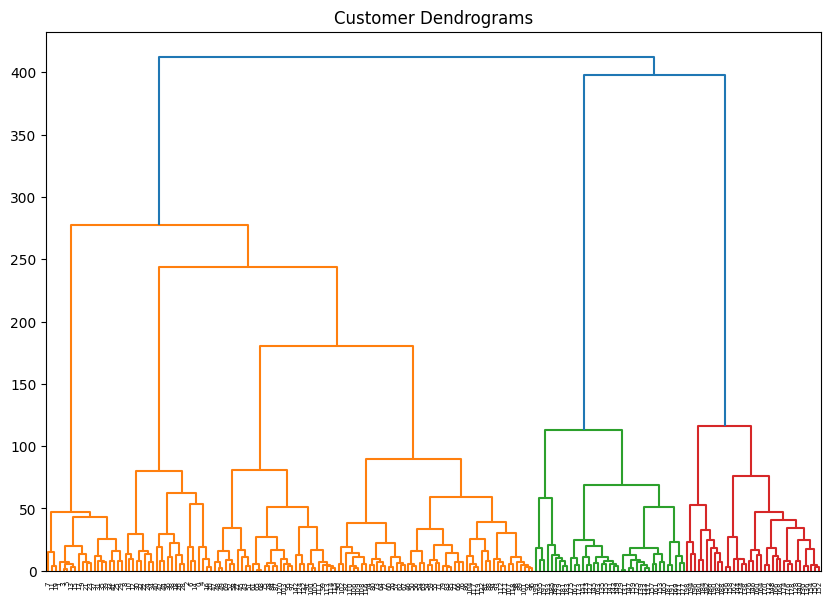

In [ ]:
data_dropped = data.drop(columns=['CustomerID', 'Genre'])
plt.figure(figsize=(10, 7))
plt.title("Customer Dendrograms")
dend = shc.dendrogram(shc.linkage(data_dropped, method='ward'))
plt.show()

*   3.2. Apply K-Means to the preprocessed dataset with k belongs to [2,10]. Then compute SSE values and plot them to find the best value of k.

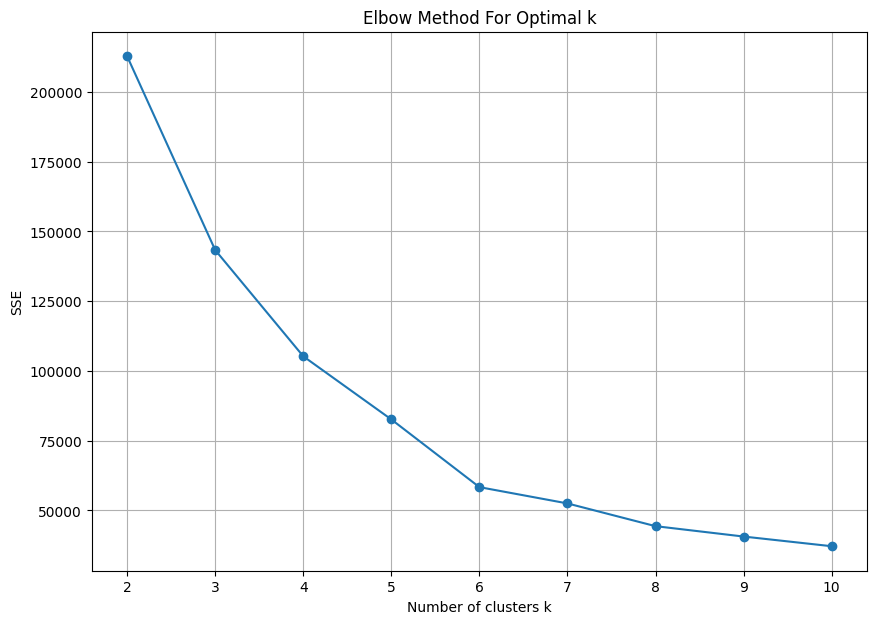

In [ ]:
sse = []
k_range = range(2, 11)
for k in k_range:
    k_means = KMeans(n_clusters=k, random_state=0)
    k_means.fit(data_dropped)
    sse.append(k_means.inertia_)

plt.figure(figsize=(10, 7))
plt.plot(k_range, sse, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters k')
plt.ylabel('SSE')
plt.xticks(k_range)
plt.grid(True)
plt.show()

*   3.2. From the obtained dengrograms, choose an appropriate number of clusters and apply **AgglomerativeClustering** algorithm to the given dataset

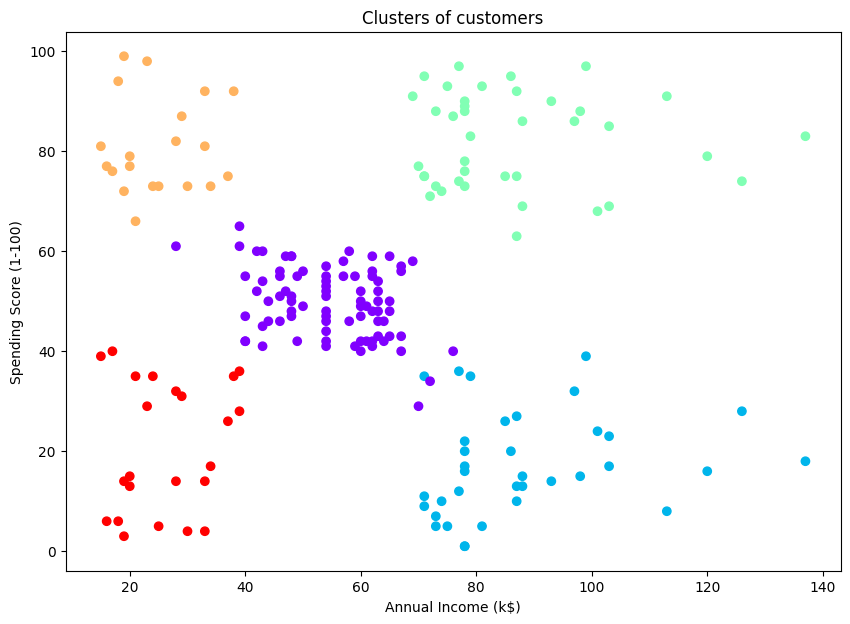

In [ ]:
agg_cluster = AgglomerativeClustering(n_clusters=5)
cluster_labels = agg_cluster.fit_predict(data_dropped)

plt.figure(figsize=(10, 7))
plt.scatter(data_dropped['Annual Income (k$)'], data_dropped['Spending Score (1-100)'],
                                                        c=cluster_labels, cmap='rainbow')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

#Finally,
Save a copy in your Github. Remember renaming the notebook.